2023년 11월 7일에 마지막으로 테스트 되었습니다.  

이 자료는 위키독스 '딥 러닝을 이용한 자연어 처리 입문'의 1D CNN 학습 자료입니다.  

링크 : https://wikidocs.net/80783

# 1. 데이터에 대한 전처리

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
tf.__version__

'2.14.0'

In [3]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
print(X_train[:5])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [5]:
print(y_train[:5])

[1 0 0 1 0]


In [6]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

In [7]:
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (25000, 200)
X_test의 크기(shape) : (25000, 200)


# 2. 1D CNN으로 IMDB 리뷰 분류하기

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [9]:
model = Sequential()
model.add(Embedding(vocab_size, 256))
model.add(Dropout(0.3))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         2560000   
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 256)         196864    
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [11]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [12]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), callbacks=[es, mc])

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.4183 - acc: 0.7968
Epoch 1: val_acc improved from -inf to 0.88100, saving model to best_model.h5
782/782 [==============================] - 47s 45ms/step - loss: 0.4183 - acc: 0.7968 - val_loss: 0.2823 - val_acc: 0.8810
Epoch 2/20
  1/782 [..............................] - ETA: 9s - loss: 0.1740 - acc: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - ETA: 0s - loss: 0.2204 - acc: 0.9145
Epoch 2: val_acc improved from 0.88100 to 0.88976, saving model to best_model.h5
782/782 [==============================] - 12s 15ms/step - loss: 0.2204 - acc: 0.9145 - val_loss: 0.2716 - val_acc: 0.8898
Epoch 3/20
782/782 [==============================] - ETA: 0s - loss: 0.1162 - acc: 0.9590
Epoch 3: val_acc did not improve from 0.88976
782/782 [==============================] - 10s 13ms/step - loss: 0.1162 - acc: 0.9590 - val_loss: 0.3008 - val_acc: 0.8860
Epoch 4/20
782/782 [==============================] - ETA: 0s - loss: 0.0520 - acc: 0.9831
Epoch 4: val_acc did not improve from 0.88976
782/782 [==============================] - 10s 13ms/step - loss: 0.0520 - acc: 0.9831 - val_loss: 0.3902 - val_acc: 0.8812
Epoch 5/20
782/782 [==============================] - ETA: 0s - loss: 0.0327 - acc: 0.9885
Epoch 5: val_acc did not improve from 0.88976
782/782 [==============================] - 10s 13ms/step - 

In [13]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 3s 4ms/step - loss: 0.2716 - acc: 0.8898

 테스트 정확도: 0.8898


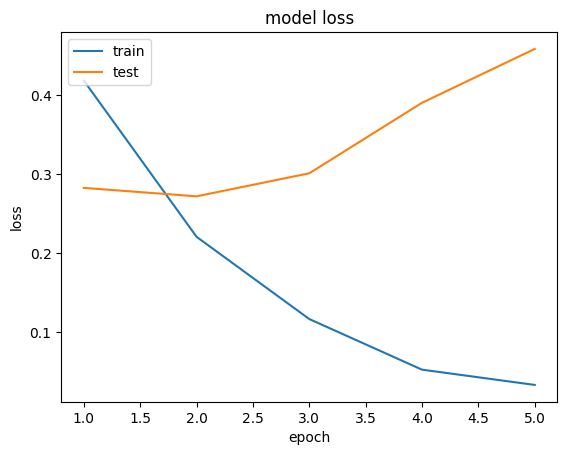

In [14]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()